In [1]:
import pandas as pd
import numpy as np
import os
import sys
import gensim
import platform
import matplotlib.pyplot as plt
import seaborn as sns
from src.embeddings.get_embeddins import get_columns_embeddings
print(platform.python_version())

3.10.10


In [4]:
data_dir = 'data'
model_pth = 'models/fasttext_one_element_240130-085027.model'

In [5]:
from gensim.models import FastText
model = FastText.load(model_pth)

In [6]:
embeddings = get_columns_embeddings(model, data_dir)

In [7]:
embeddings_vectors = np.array([emb.embedding for emb in embeddings])

In [8]:
import pickle
with open('embeddings/embeddings.pkl', 'wb') as f:
    pickle.dump(embeddings, f)

In [9]:
for i in range(len(embeddings_vectors)):
    try:
        if embeddings_vectors[i].shape != embeddings_vectors[0].shape:
            print(i)
    except Exception:
        print(i)
        print(embeddings_vectors[i])
        print(embeddings[i])

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
distortions_sil = []
distortions_elb = []
K = range(5,150)
for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    model.fit(embeddings_vectors)

    sil = silhouette_score(embeddings_vectors, model.labels_, metric='euclidean')
    distortions_sil.append(sil)

    elb = model.inertia_
    distortions_elb.append(elb)
    print(f'{k}: {sil};;; {elb}')

5: 0.24469821155071259;;; 0.28237444162368774
6: 0.25489163398742676;;; 0.2708342969417572
7: 0.25677555799484253;;; 0.2693980932235718
8: 0.35981670022010803;;; 0.21993832290172577
9: 0.36618542671203613;;; 0.20780175924301147
10: 0.3925724923610687;;; 0.18721944093704224
11: 0.39941635727882385;;; 0.18093417584896088
12: 0.3983192443847656;;; 0.18505460023880005
13: 0.39594560861587524;;; 0.18304480612277985
14: 0.4020126163959503;;; 0.1740483045578003
15: 0.40497320890426636;;; 0.17128345370292664
16: 0.4061064124107361;;; 0.15901756286621094
17: 0.39005085825920105;;; 0.15602095425128937
18: 0.401028037071228;;; 0.14741361141204834
19: 0.40431487560272217;;; 0.14511868357658386
20: 0.4040447771549225;;; 0.1442626416683197
21: 0.29196324944496155;;; 0.13829851150512695
22: 0.2992353141307831;;; 0.1340777426958084
23: 0.29273509979248047;;; 0.13354486227035522
24: 0.29106956720352173;;; 0.1332358866930008
25: 0.2822566628456116;;; 0.12937401235103607
26: 0.28569296002388;;; 0.1273166

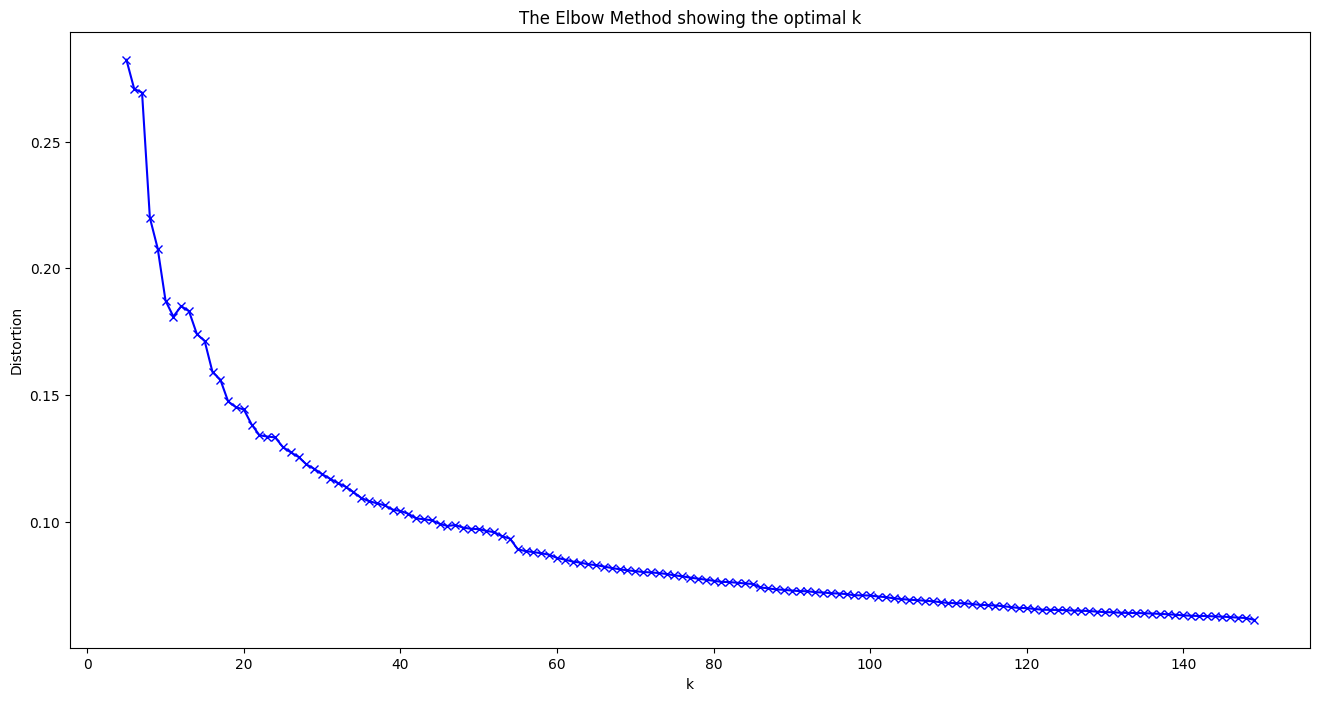

In [12]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions_elb, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show() # 5 9 11

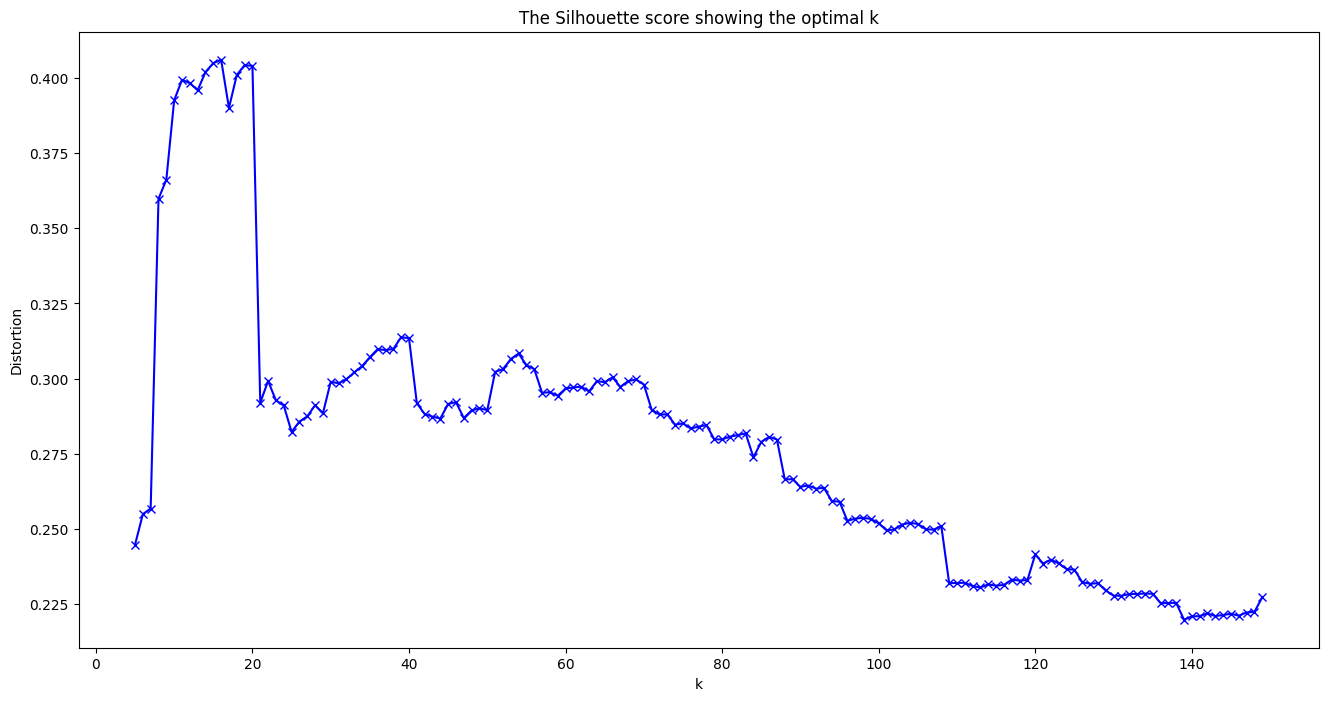

In [13]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Silhouette score showing the optimal k')
plt.show() # 5 7 10 13

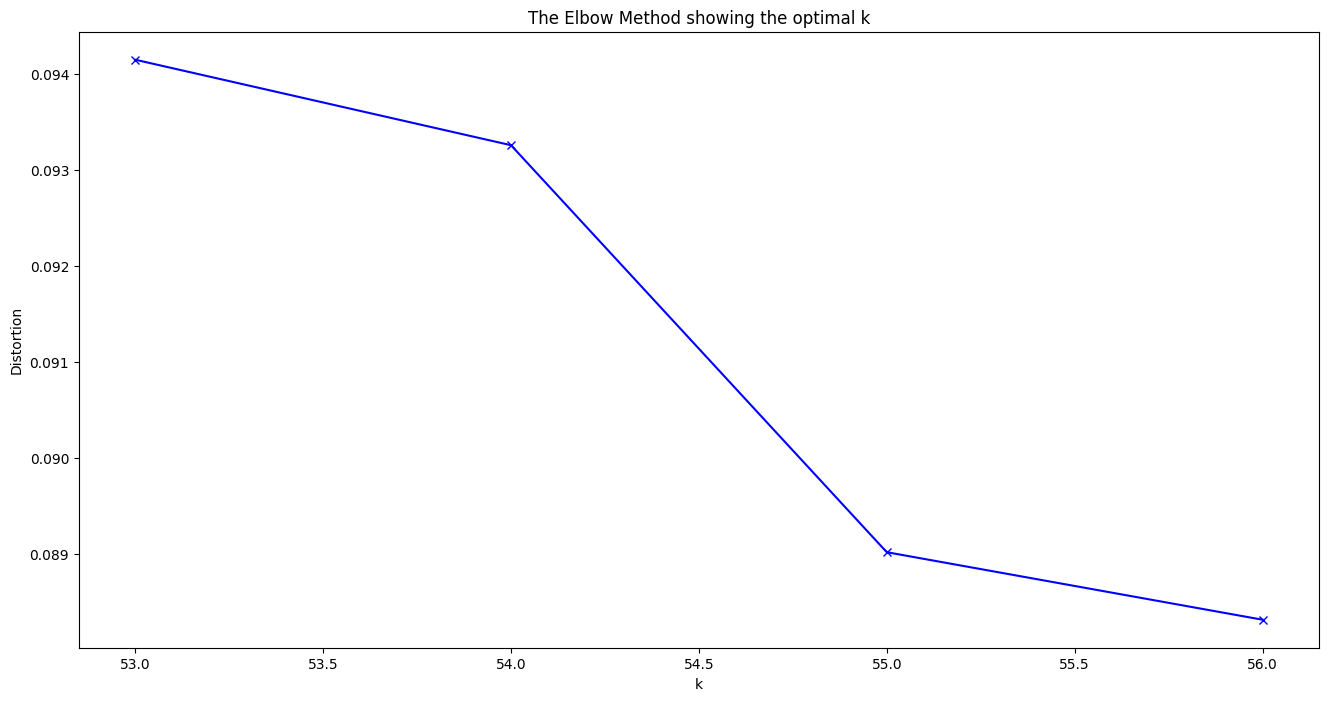

In [82]:
plt.figure(figsize=(16,8))
plt.plot(K[48:52], distortions_elb[48:52], 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show() # 5 9 11

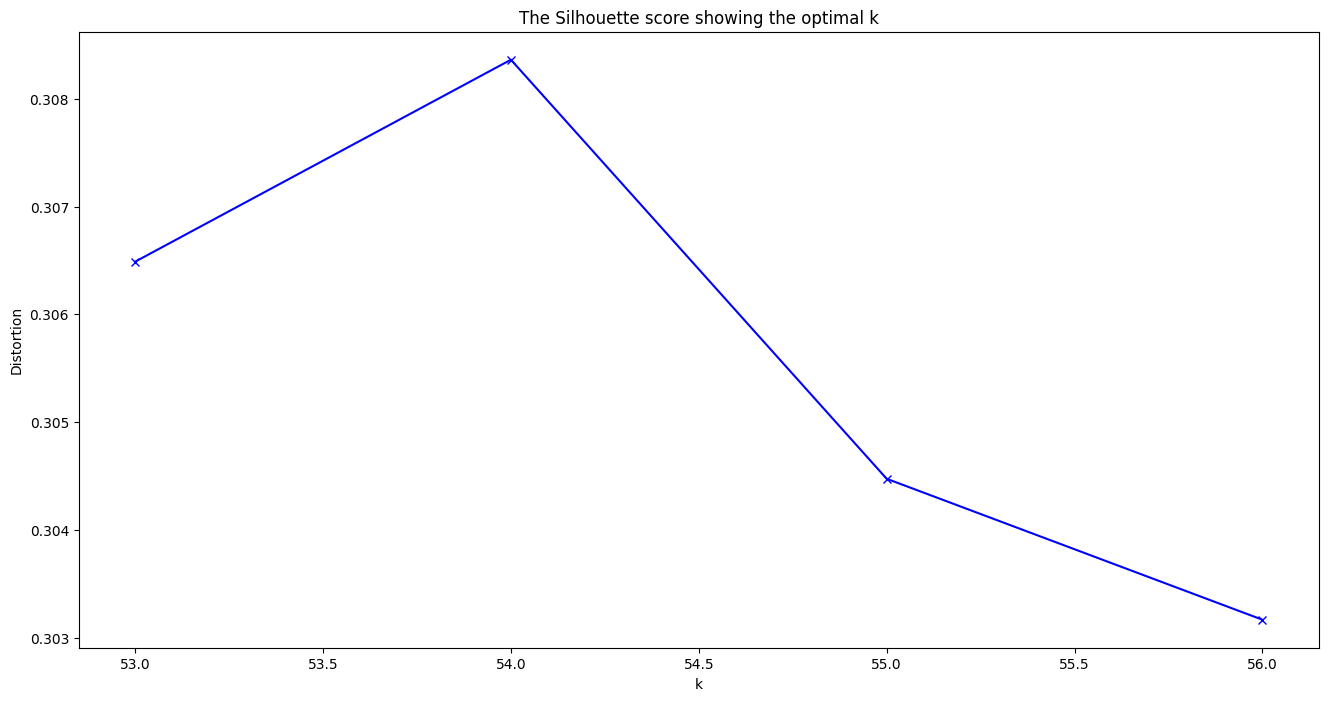

In [81]:
plt.figure(figsize=(16,8))
plt.plot(K[48:52], distortions_sil[48:52], 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Silhouette score showing the optimal k')
plt.show() # 5 7 10 13

In [84]:
print(K[50])
print(distortions_sil[50])
print(distortions_elb[50])

55
0.30447432
0.08901435136795044


Ответ будет 55-56 или 18

*56*

In [65]:
c = 55 #c = 22 -> ok

In [36]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=1250, init='pca')
tsne_results = tsne.fit_transform(embeddings_vectors)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 16130 samples in 0.002s...
[t-SNE] Computed neighbors for 16130 samples in 0.798s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16130
[t-SNE] Computed conditional probabilities for sample 2000 / 16130
[t-SNE] Computed conditional probabilities for sample 3000 / 16130
[t-SNE] Computed conditional probabilities for sample 4000 / 16130
[t-SNE] Computed conditional probabilities for sample 5000 / 16130
[t-SNE] Computed conditional probabilities for sample 6000 / 16130
[t-SNE] Computed conditional probabilities for sample 7000 / 16130
[t-SNE] Computed conditional probabilities for sample 8000 / 16130
[t-SNE] Computed conditional probabilities for sample 9000 / 16130
[t-SNE] Computed conditional probabilities for sample 10000 / 16130
[t-SNE] Computed conditional probabilities for sample 11000 / 16130
[t-SNE] Computed conditional probabilities for sample 12000 / 16130
[t-SNE] Computed conditional probabilities for sam

In [37]:
tsne_x = tsne_results[:, 0]
tsne_y = tsne_results[:, 1]

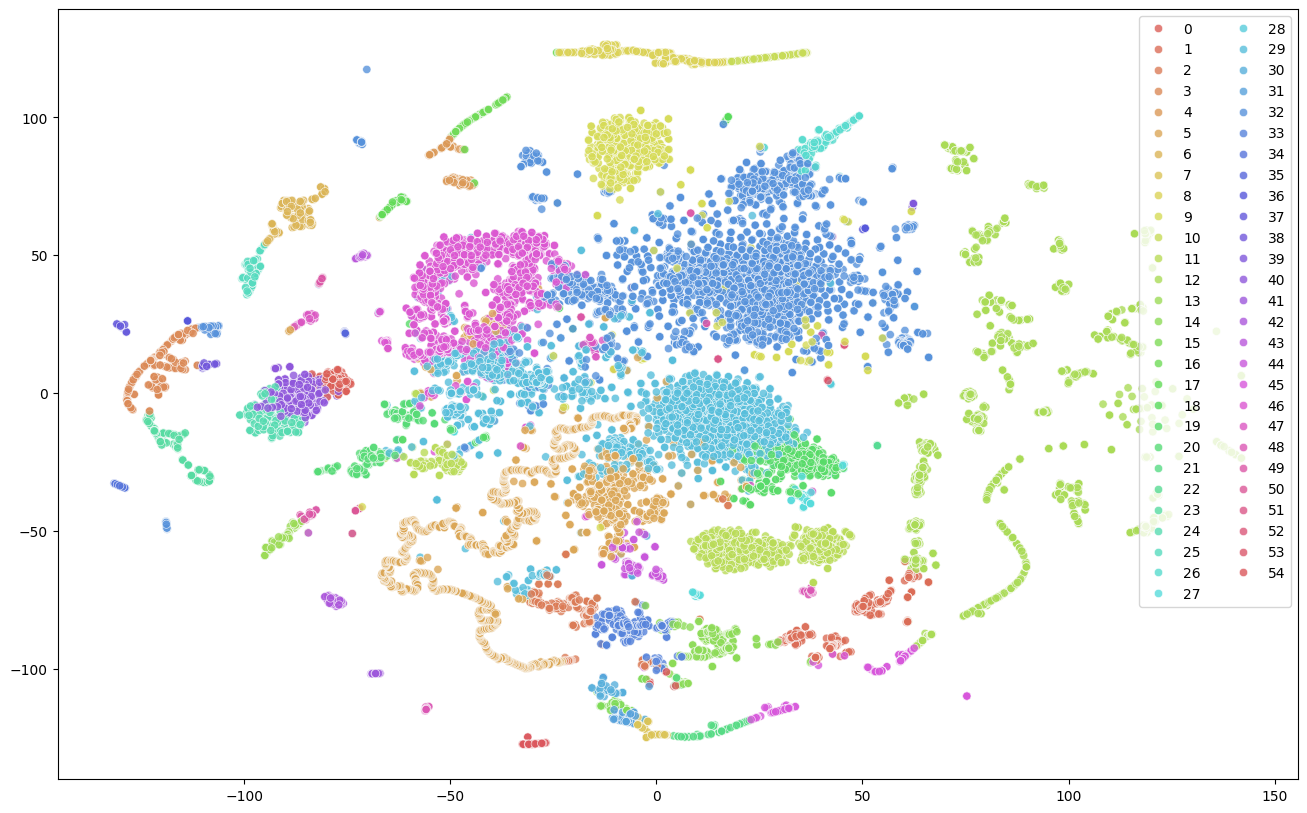

In [78]:
km = KMeans(n_clusters=c, random_state=42, n_init='auto')
vs = km.fit_predict(embeddings_vectors)
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_x, y=tsne_y,
    hue=vs,
    palette=sns.color_palette("hls", c),
    legend="full",
    alpha=0.8
)
plt.legend(ncol=2)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


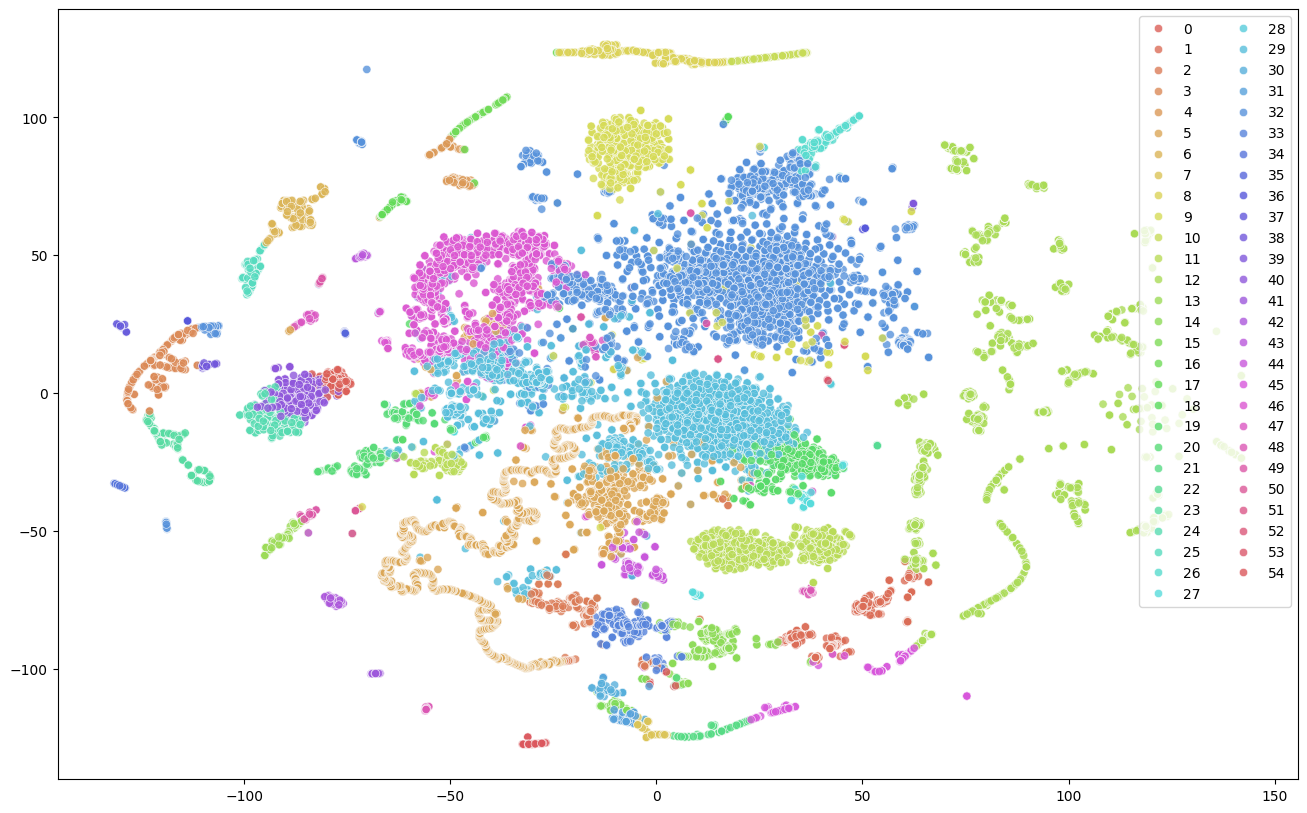

In [79]:
km = KMeans(n_clusters=c, random_state=42, n_init='auto')
vs = km.fit_predict(embeddings_vectors)
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_x, y=tsne_y,
    hue=vs,
    palette=sns.color_palette("hls", c),
    legend="full",
    alpha=0.8
)
plt.legend(ncol=2)
plt.savefig('tsne_clusters.eps', format='eps')

In [85]:
inds = np.arange(0, len(vs))[vs == 0]
embs = [embeddings[i] for i in inds]
for el in embs:
    print(el.file_pth,  '|', el.col_name)

data/sales-transaction-dataset-with-product-details/Sales_Product_Details.csv | Date
data/insider-trading-sp500-inside-info/MDT.csv | Date
data/insider-trading-sp500-inside-info/FOX.csv | Date
data/insider-trading-sp500-inside-info/SWKS.csv | Date
data/insider-trading-sp500-inside-info/MSCI.csv | Date
data/insider-trading-sp500-inside-info/T.csv | Date
data/insider-trading-sp500-inside-info/OGN.csv | Date
data/insider-trading-sp500-inside-info/LNT.csv | Date
data/insider-trading-sp500-inside-info/BAC.csv | Date
data/insider-trading-sp500-inside-info/LNC.csv | Date
data/insider-trading-sp500-inside-info/TECH.csv | Date
data/insider-trading-sp500-inside-info/IQV.csv | Date
data/insider-trading-sp500-inside-info/ESS.csv | Date
data/insider-trading-sp500-inside-info/DXC.csv | Date
data/insider-trading-sp500-inside-info/TFX.csv | Date
data/insider-trading-sp500-inside-info/REG.csv | Date
data/insider-trading-sp500-inside-info/NWS.csv | Date
data/insider-trading-sp500-inside-info/MDLZ.csv | 

In [72]:
inds = np.arange(0, len(vs))[vs == 5]
embs = [embeddings[i] for i in inds]
for el in embs:
    print(el.file_pth,  '|', el.col_name)

data/random_fake_table_43_ru_RU.csv | building_number
data/random_fake_table_18_ru_RU.csv | credit_card_security_code
data/random_fake_table_20_ru_RU.csv | day_of_month
data/random_fake_table_5_en_US.csv | building_number
data/random_fake_table_45_ru_RU.csv | day_of_month
data/random_fake_table_35_ru_RU.csv | plate_suffix
data/random_fake_table_35_ru_RU.csv | plate_number
data/random_fake_table_16_en_US.csv | building_number
data/random_fake_table_6_ru_RU.csv | building_number
data/random_fake_table_6_ru_RU.csv | credit_card_security_code
data/random_fake_table_44_ru_RU.csv | numerify
data/random_fake_table_46_en_US.csv | credit_card_security_code
data/random_fake_table_4_en_US.csv | credit_card_security_code
data/random_fake_table_49_ru_RU.csv | day_of_month
data/random_fake_table_17_ru_RU.csv | plate_number
data/random_fake_table_7_en_US.csv | day_of_month
data/random_fake_table_47_ru_RU.csv | plate_number_extra
data/random_fake_table_32_en_US.csv | building_number
data/random_fake_t